In [1]:
# load libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import requests
import zipfile

In [2]:
# set data and output folder
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
# download data
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/download/'

# This is a subset of the main HydroRivers dataset of all
# rivers having `UPLAND_SKM` value  greater than 100 sq. km.
hydrorivers_file = 'hydrorivers_100.gpkg'
hydrorivers_url = data_url + 'hydrosheds/'

countries_file = 'ne_10m_admin_0_countries_ind.zip'
countries_url = data_url + 'naturalearth/'


download(hydrorivers_url + hydrorivers_file)
download(countries_url + countries_file)

Downloaded data/hydrorivers_100.gpkg
Downloaded data/ne_10m_admin_0_countries_ind.zip


In [4]:
# read the countries shapefile
countries_filepath = os.path.join(data_folder, countries_file)

In [5]:
# print country values
country_gdf = gpd.read_file(countries_filepath)
print(sorted(country_gdf.SOVEREIGNT.unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bir Tawil', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brazilian Island', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', '

In [6]:
# choose canada
country = 'Canada'

In [7]:
# filter canada only
selected_country = country_gdf[
    (country_gdf['SOVEREIGNT'] == country) &
    (country_gdf['TYPE'] != 'Dependency')
]
selected_country

,ADM0_A3_IN,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
151,CAN,Admin-0 country,0,2,Canada,CAN,0,2,Sovereign country,1,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-95.16057 49.36949, -95.16034 ..."


In [8]:
# clip rivers dataset to canada
hydrorivers_filepath = os.path.join(data_folder, hydrorivers_file)
river_gdf = gpd.read_file(hydrorivers_filepath, mask=selected_country)
river_gdf

,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,geometry
0,70087703,70087510,70082015,1.07,69.8,26.5,1.11,124.6,0,2.018,3,3,6,7120151720,"MULTILINESTRING ((-76.93125 55.03958, -76.9395..."
1,70078708,70079343,70082015,1.00,110.1,320.7,1.83,7257.2,0,115.339,5,2,4,7120145440,"MULTILINESTRING ((-76.89375 55.42292, -76.8937..."
2,70027440,70027377,70026619,0.77,17.5,175.1,0.46,3883.4,0,57.505,5,1,5,7120108800,"MULTILINESTRING ((-76.94792 57.95208, -76.9520..."
3,70027377,70027026,70026619,2.50,14.8,177.7,2.96,3893.7,0,57.669,5,1,5,7120108800,"MULTILINESTRING ((-76.95625 57.95625, -76.9520..."
4,70011479,70011428,70009700,0.52,84.2,114.1,0.22,1506.0,0,21.481,4,1,5,7120098320,"MULTILINESTRING ((-76.89375 59.03542, -76.8979..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173767,80123984,80123985,80044492,0.50,2981.3,99.4,0.36,1672.4,0,9.751,4,2,6,8120173360,"MULTILINESTRING ((-113.21042 65.28542, -113.20..."
173768,80123985,80124068,80044492,6.59,2974.5,106.1,3.32,1687.2,0,9.662,4,2,6,8120173360,"MULTILINESTRING ((-113.20625 65.28125, -113.06..."
173769,80124282,80124918,80044492,6.98,2973.0,99.7,3.50,2216.3,0,10.539,4,3,5,8120173500,"MULTILINESTRING ((-113.20208 65.26875, -113.05..."
173770,80132919,80133039,80044492,0.50,2942.2,20.4,1.45,173.5,0,0.906,2,3,7,8120402330,"MULTILINESTRING ((-113.01042 64.95208, -113.00..."


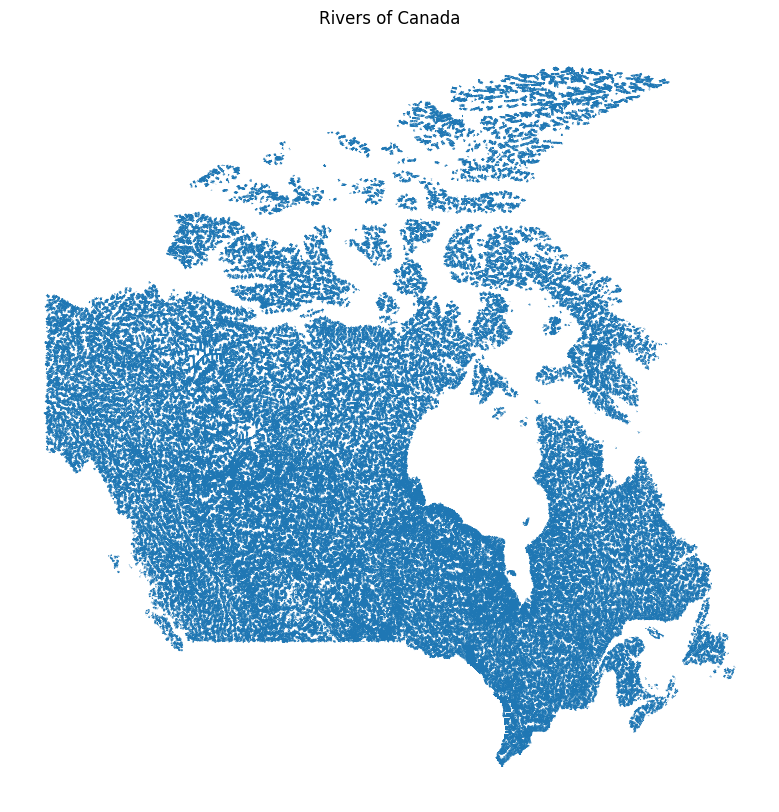

In [9]:
# plot the river network
fig, ax = plt.subplots(figsize=(10, 10))
title = f'Rivers of {country}'
river_gdf.plot(ax=ax)
ax.set_title(title)
ax.set_axis_off()
plt.show()

In [12]:
# print min and max river size
print(river_gdf['UPLAND_SKM'].max(), river_gdf['UPLAND_SKM'].min())

1795841.0 100.1


In [33]:
# create a width column scaled to river values
original_min = river_gdf['UPLAND_SKM'].min()
original_max = river_gdf['UPLAND_SKM'].max()
target_min = 0.2
target_max = 0.8
scaled = (river_gdf['UPLAND_SKM'] - original_min) / (original_max - original_min)
river_gdf['width'] = scaled.clip(0, 1) * (target_max - target_min) + target_min
river_gdf_final = river_gdf.sort_values(['UPLAND_SKM', 'width'])[
    ['MAIN_RIV', 'UPLAND_SKM', 'width', 'geometry']]
river_gdf_final

,MAIN_RIV,UPLAND_SKM,width,geometry
3621,80004606,100.1,0.200000,"MULTILINESTRING ((-84.90625 79.78125, -84.9020..."
6722,80009115,100.1,0.200000,"MULTILINESTRING ((-83.26875 76.88958, -83.2895..."
6897,80174341,100.1,0.200000,"MULTILINESTRING ((-70.36875 63.64792, -70.4020..."
8484,80087764,100.1,0.200000,"MULTILINESTRING ((-63.91875 66.64375, -63.9270..."
9168,80141324,100.1,0.200000,"MULTILINESTRING ((-66.06875 64.61042, -66.0562..."
...,...,...,...,...
143339,80044492,1795616.0,0.799925,"MULTILINESTRING ((-134.99375 69.03542, -134.99..."
143340,80044492,1795640.0,0.799933,"MULTILINESTRING ((-134.99792 69.13125, -134.99..."
143341,80044492,1795749.0,0.799969,"MULTILINESTRING ((-135.01875 69.17292, -135.02..."
143342,80044492,1795805.0,0.799988,"MULTILINESTRING ((-135.13125 69.18542, -135.12..."


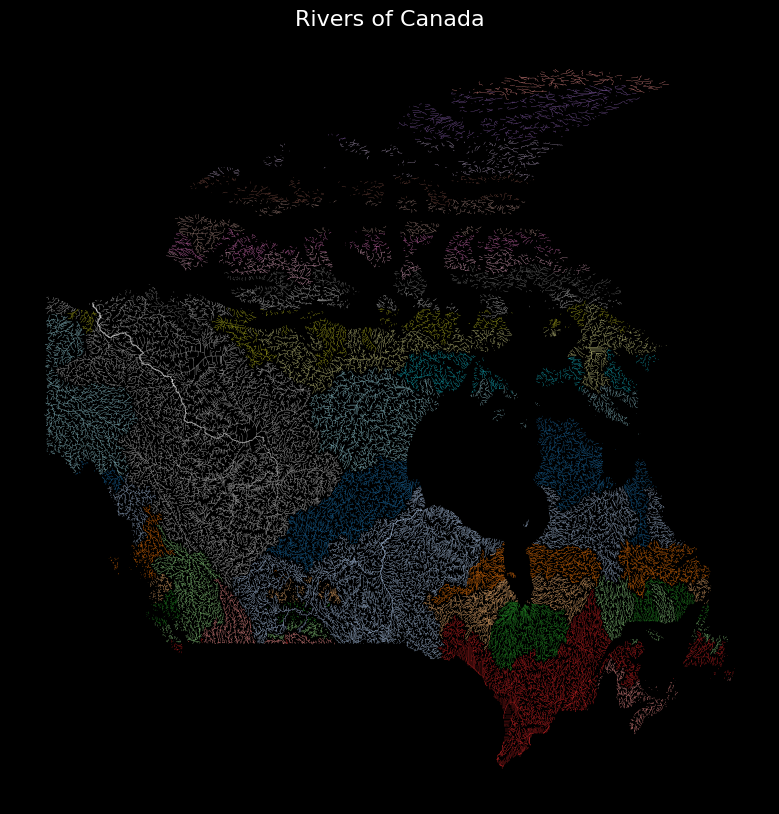

In [41]:
# plot the river network
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))
title = f'Rivers of {country}'
river_gdf_final.plot(ax=ax, column='MAIN_RIV', categorical=True,
                     linewidth=river_gdf_final['width'], cmap='tab20')
ax.set_title(title, color='white', fontsize=16)
ax.set_axis_off()

plt.savefig('output/rivers_canada.png', bbox_inches='tight')
plt.show()